**Goal: Given transaction features, predict whether a transaction is fraudulent (Class = 1) or legitimate (Class = 0)**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import os

# The previous cell contains the path to the downloaded dataset directory.
# Let's inspect the contents of this directory to find the actual data file (e.g., a .csv file).
print(f"Contents of the dataset directory '{path}':")
print(os.listdir(path))

Contents of the dataset directory '/kaggle/input/creditcardfraud':
['creditcard.csv']


In [ ]:
import pandas as pd

# The dataset contains a file named 'creditcard.csv', you would load it like this:
df = pd.read_csv(os.path.join(path, 'creditcard.csv'))

# Once df is loaded, you can call df.head()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# inspect the structure and quality of a dataset

print("Shape (rows, cols):", df.shape)
print("\nFirst 3 columns:", list(df.columns[:3]))
print("Total columns:", len(df.columns))

print("\nDtype counts:")
print(df.dtypes.value_counts())
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\nEstimated memory usage: {mem_mb:.2f} MB")

dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

Shape (rows, cols): (284807, 31)

First 3 columns: ['Time', 'V1', 'V2']
Total columns: 31

Dtype counts:
float64    30
int64       1
Name: count, dtype: int64

Estimated memory usage: 67.36 MB

Duplicate rows: 1081


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# null values

df.isnull().sum().sort_values(ascending=False)

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# missing values

import matplotlib.pyplot as plt
import seaborn as sns

na_counts = df.isna().sum()
na_pct = (na_counts / len(df) * 100).round(2)
na_df = (
    pd.DataFrame({"missing": na_counts, "%": na_pct})
    .sort_values(["missing", "%"], ascending=False)
)
print(na_df.head(20))

print(f"----------------------------------------")

# visualize
top = na_df[na_df["missing"] > 0].head()

if not top.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top.index, y=top["%"], color="salmon")

    plt.title("Top missing columns (% of rows)")
    plt.ylabel("% missing")
    plt.xlabel("Column")
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")

      missing    %
Time        0  0.0
V1          0  0.0
V2          0  0.0
V3          0  0.0
V4          0  0.0
V5          0  0.0
V6          0  0.0
V7          0  0.0
V8          0  0.0
V9          0  0.0
V10         0  0.0
V11         0  0.0
V12         0  0.0
V13         0  0.0
V14         0  0.0
V15         0  0.0
V16         0  0.0
V17         0  0.0
V18         0  0.0
V19         0  0.0
----------------------------------------
No missing values detected.


In [ ]:
# Class distribution
class_counts = df['Class'].value_counts().rename(index={0:'Legit(0)', 1:'Fraud(1)'})
class_ratio = df['Class'].mean()
print('Class distribution:')
display(class_counts.to_frame('count'))

class_pct = df["Class"].value_counts(normalize=True, dropna=False).sort_index() * 100
print("\nClass percentages (%):\n", class_pct.round(2))

minority_rate = class_pct.min()
majority_rate = class_pct.max()

print(f"\nMajority-class baseline accuracy: {majority_rate:.2f}%")
print(f'Fraud rate: {class_ratio:.5f} (~{class_ratio*100:.3f}%)')

Class distribution:


,count
Class,
Legit(0),284315
Fraud(1),492



Class percentages (%):
 Class
0    99.83
1     0.17
Name: proportion, dtype: float64

Majority-class baseline accuracy: 99.83%
Fraud rate: 0.00173 (~0.173%)


**Clearly indicates a significant class imbalance, with only about 0.173% of transactions being fraudulent**

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title("Class distribution (0 = normal, 1 = fraud)")
plt.xlabel("Class")
plt.ylabel("Number of transactions")

plt.show()

In [ ]:
display(df[['Time','Amount']].describe(percentiles=[]))

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
50%,84692.000000,22.000000
max,172792.000000,25691.160000


**Amount Distribution:**

The Amount column shows a heavily right-skewed distribution. **The mean (88.35) is significantly higher than the median (22.00)**, and **the maximum value (25691.16) is much larger than both** -> indicates that most transactions are for small amounts, while a few transactions are for very large amounts.

**In fraud detection, these large or outlier amounts often warrant closer investigation as they can sometimes be indicators of fraudulent activity**

**Time (Relative Measurement):**

The Time column ranges from 0.0 to 172792.0. This strongly suggests that 'Time' represents the seconds elapsed since the very first transaction in the dataset, rather than an absolute timestamp.

**This relative time feature can be engineered into more useful features, such as 'hour of day' or 'day of week' (if the total time span allows for it), which might reveal patterns in fraudulent transactions.**

In [ ]:
# *************************to calculate skewness (symmetrical or asymetrical)*********************
# ************************kurtosis (heaviness of tails(peaks) compared to normal distribution)****
from scipy.stats import skew
from scipy.stats import kurtosis

skew_value = skew(df['Class'])
print(f"Skewness Coefficient: {skew_value:.3f}")        # .3f means till 3 decimal values

print()

kurtosis_value = kurtosis(df['Class'])
print(f"Kurtosis Coefficient: {kurtosis_value:.3f}")

Skewness Coefficient: 23.997

Kurtosis Coefficient: 573.878


**Skewness Coefficient: 23.997**

Skewness measures the asymmetry of the distribution.

A value of 0 means perfectly symmetrical.

A value of 23.997 is extremely positive, meaning:

The distribution is heavily right-skewed.

Most values are concentrated at Class = 0 (legit), with a tiny tail at Class = 1 (fraud).

This confirms severe class imbalance — fraud cases are extremely rare.

**Kurtosis Coefficient: 573.878**

Kurtosis measures the tailedness or peakedness of the distribution.

A normal distribution has kurtosis ≈ 3.

A value of 573.878 is extremely high, meaning:

The distribution has a very sharp peak at Class = 0.

The tails (fraud cases) are very thin and rare.

Indicates extreme concentration of data around the majority class.

In [ ]:
# Object and Category: unique values

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

if cat_cols:
    card = df[cat_cols].nunique(dropna=False).sort_values(ascending=False)
    print("Top 15 categorical columns by unique values:\n")
    print(card.head(15))
else:
    print("No categorical columns detected.")

No categorical columns detected.


In pandas, **object** is generally used for columns that contain strings or a mix of Python objects.

The **category** data type is a pandas-specific type for representing categorical data efficiently, which can save memory and speed up certain operations when you have a limited number of unique values.

All columns in this dataset are either float64 or int64 => means dataset contains only numerical data, which is why
correctly reported "No categorical columns detected."

**There are no 'object' or 'category' type columns in your df DataFrame.**

**EDA**

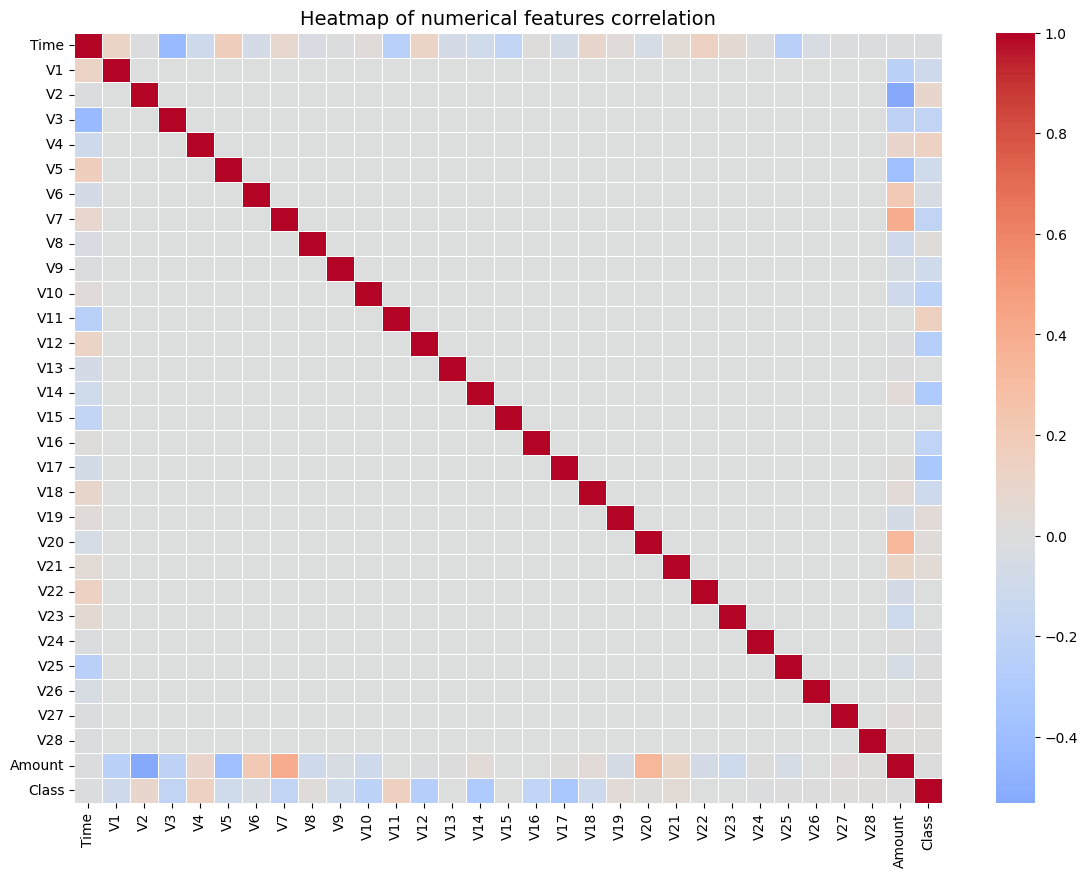

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


In [ ]:
# Correlation amongst features

corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap of numerical features correlation", fontsize=14)
plt.show()

# Strong correlation with Class{0,1}
df.corr()['Class'].sort_values(ascending=False)

** Constraints: As per Author

PCA features (V1–V28): Already standardized by dataset authors → No need to rescale.

Amount & Time: Must be scaled (e.g., StandardScaler or MinMaxScaler) → prevents magnitude dominance in ML models**

Correlation with Class (Fraud Indicator)
Strongest correlations with Class (positive or negative):

V17, V14, V12, V10 → strong negative correlation (deep blue)

V4, V11, V7 → moderate positive correlation (light red)

These features are most predictive of fraud and should be prioritized in:

Feature selection

Model interpretation

SHAP or permutation importance analysis



Low correlation features (e.g., Time, Amount):

May still be useful in non-linear models (e.g., XGBoost, Random Forest)

Below: Tree-based models (Random Forest, XGBoost, LightGBM) split data by thresholds.
Because of this, they don’t care about feature magnitude or scaling — scaling won’t change the splits.

**So scaling Time and Amount is not required for Random Forest.**

But scaling them does no harm either, and it makes your dataset ready for other models (Logistic Regression, SVM, Neural Nets) that do require scaling.

,Time,hour_of_day,scaled_hour_of_day,Amount,scaled_amount,Class
0,0.0,0.000000,-2.486373,149.62,0.244964,0
1,0.0,0.000000,-2.486373,2.69,-0.342475,0
2,1.0,0.000278,-2.486326,378.66,1.160686,0
3,1.0,0.000278,-2.486326,123.50,0.140534,0
4,2.0,0.000556,-2.486278,69.99,-0.073403,0


------------------------Visualize---------------------------------------------


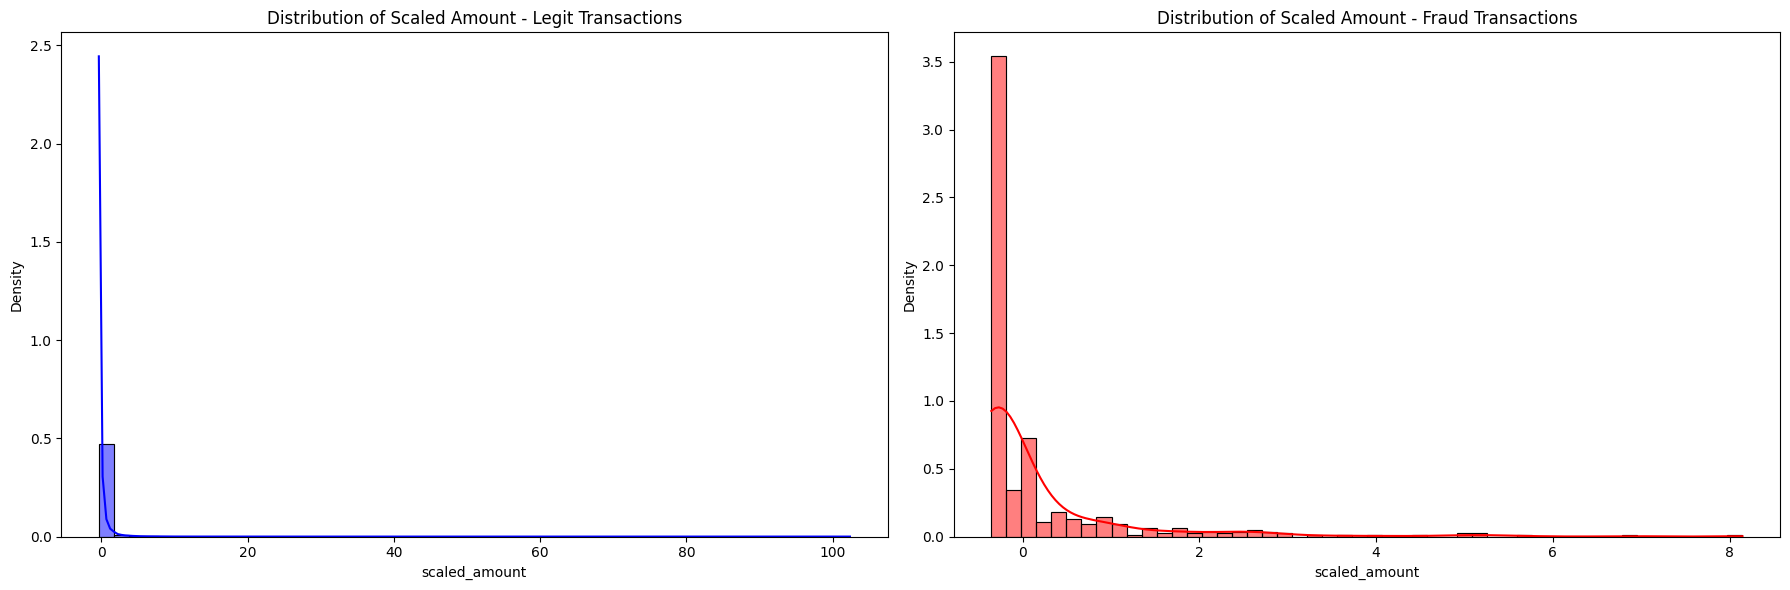

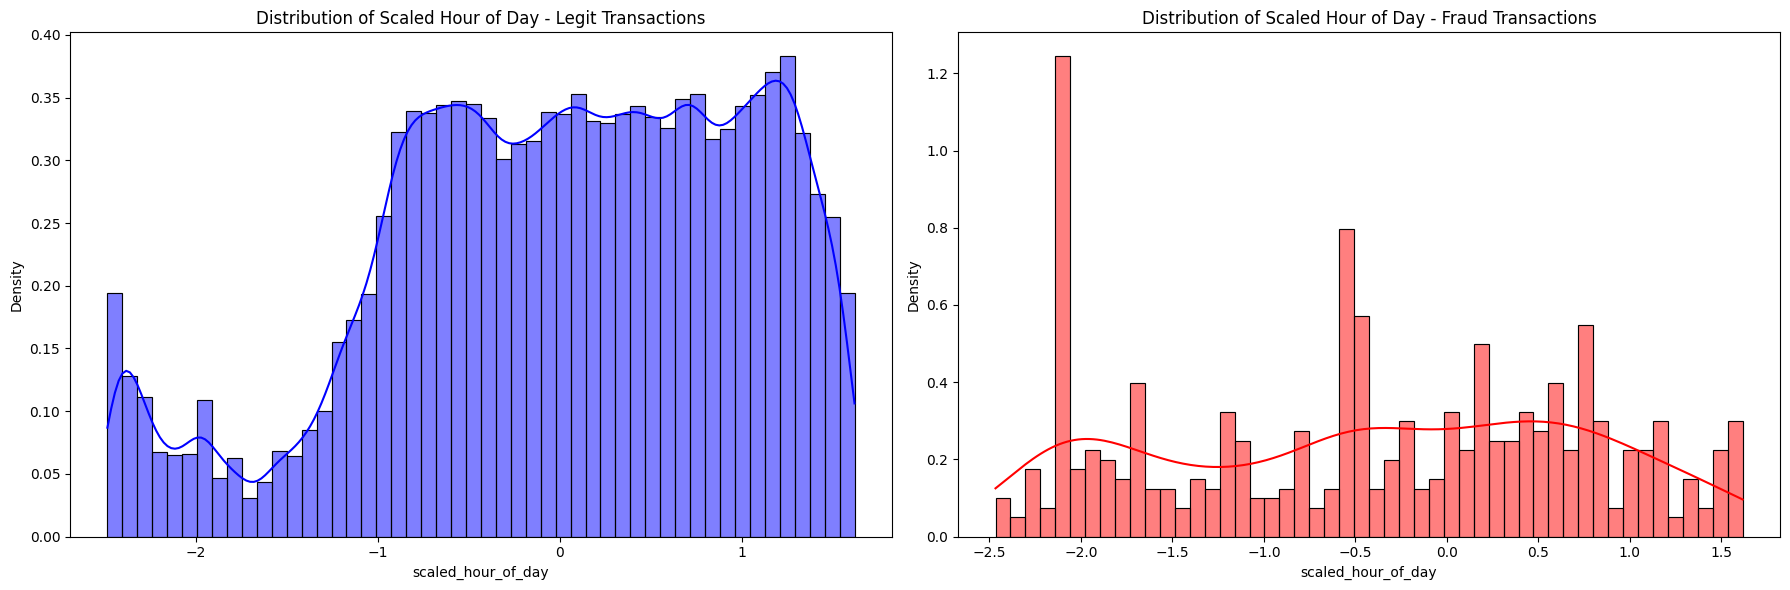

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering: 'Time' to 'hour_of_day'
# Convert time in seconds to hours
df['hour_of_day'] = (df['Time'] / 3600) % 24

# Scaling 'Amount' and 'hour_of_day'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_hour_of_day'] = scaler.fit_transform(df['hour_of_day'].values.reshape(-1, 1))

# Display the first few rows with new features
display(df[['Time', 'hour_of_day', 'scaled_hour_of_day', 'Amount', 'scaled_amount', 'Class']].head())

print(f"------------------------Visualize---------------------------------------------")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df[df['Class'] == 0]['scaled_amount'], ax=ax1, color='blue', stat='density', kde=True, bins=50)
ax1.set_title('Distribution of Scaled Amount - Legit Transactions')
sns.histplot(df[df['Class'] == 1]['scaled_amount'], ax=ax2, color='red', stat='density', kde=True, bins=50)
ax2.set_title('Distribution of Scaled Amount - Fraud Transactions')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df[df['Class'] == 0]['scaled_hour_of_day'], ax=ax1, color='blue', stat='density', kde=True, bins=50)
ax1.set_title('Distribution of Scaled Hour of Day - Legit Transactions')
sns.histplot(df[df['Class'] == 1]['scaled_hour_of_day'], ax=ax2, color='red', stat='density', kde=True, bins=50)
ax2.set_title('Distribution of Scaled Hour of Day - Fraud Transactions')
plt.tight_layout()
plt.show()

Insight:

scaled Amount:

1. Most transactions — whether legit or fraud — occur at low amounts.

2. The red fraud curve is narrower and more concentrated near the lower end of the scale -> suggests that fraudulent transactions tend to be small — possibly to avoid detection.

3. The blue legit curve has a longer tail, indicating that high-value transactions are more common among legitimate users. This could mean fraudsters avoid large amounts to stay under the radar.

scaled time:

The blue curve (Class 0) shows a strong peak between scaled hours -1 and +1, which corresponds to a specific time window during the day -> suggests that most legitimate transactions happen during regular business hours.

The red curve (Class 1) is flatter and more spread out, with peaks around scaled hours -2, -0.5, and +0.5 -> implies that fraudulent activity is less predictable and may occur at odd hours, such as late night or early morning.


**Implication for modeling**

Amount alone is not a strong linear predictor, but:

You can bin Amount into categories (e.g., small, medium, large) to capture fraud patterns.

You can interact Amount with Time (e.g., large transaction at odd hour) for better signals.

Consider log transformation to reduce skewness and improve model sensitivity.



**Prepare the features (X) and the target variable (y).**

X = all V features, scaled_amount, and scaled_hour_of_day as our predictive features and

y = 'Class' as our target.

The original 'Time' and 'Amount' columns will be dropped as we are using their scaled and engineered versions.

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Time', 'Amount', 'Class', 'hour_of_day'])
y = df['Class']

# Display the shapes of X and y
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Display the first few rows of X and y to confirm
print("\nFirst 2 rows of features (X):")
display(X.head(2))
print("\nFirst 2 rows of target (y):")
display(y.head(2))

Shape of features (X): (284807, 30)
Shape of target (y): (284807,)

First 2 rows of features (X):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_hour_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-2.486373
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-2.486373



First 2 rows of target (y):


,Class
0,0
1,0


**Splitting into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


# The dataset has ~284,807 rows total. 75% → ~213,605 rows in training. 25% → ~71,202 rows in testing.
# stratified sampling worked — the fraud ratio is preserved in both sets. Fraud rate (~0.173%) is consistent in both sets.

((213605, 30),
 (71202, 30),
 np.float64(0.0017274876524425926),
 np.float64(0.0017274795651807534))

**ColumnTransformer** -> Good practice if you want a unified preprocessing pipeline that works across multiple models.

If only running Random Forest → can skip the ColumnTransformer.

If plan to compare Random Forest with Logistic Regression or SVM later → keep the ColumnTransformer so scaling is applied consistently.

It’s safe to leave it in — it won’t harm Random Forest, and it future-proofs your pipeline.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# In the current X, these are 'scaled_amount' and 'scaled_hour_of_day', which were already scaled.
# Applying StandardScaler again here is functionally redundant given the current state of X,
# but the ColumnTransformer's syntax requires a transformer object.
num_cols = ['scaled_amount', 'scaled_hour_of_day']

# ColumnTransformer for scaling Amount and Time only
preprocess = ColumnTransformer(
    transformers=[
        ('scaler_amt_time', StandardScaler(), num_cols),
    ],
    remainder='passthrough'  # keep V1..V28 as-is
)

# For reference, remember the final feature order after transformation:
# The ColumnTransformer places transformed columns first, then passes through remaining columns.
# So, the order will be the columns in num_cols, followed by other columns in X that are not in num_cols.
feature_order = num_cols + [c for c in X.columns if c not in num_cols]
print('Transformed feature order (first few):', feature_order[:10], '...', len(feature_order), 'features total')

Transformed feature order (first few): ['scaled_amount', 'scaled_hour_of_day', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'] ... 30 features total


**Baseline Model — Random Forest**

We start with a reasonably sized forest and class_weight='balanced' to address class imbalance.

Evaluate with ROC-AUC and Average Precision (PR-AUC); inspect confusion matrix and a basic report at the default threshold (0.5).

Keeping it simple for now so no hyperparameter search yet (that comes in later stages).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', rf)
])

pipe.fit(X_train, y_train)

# Probabilities for curves & metrics
proba_test = pipe.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, proba_test)
ap = average_precision_score(y_test, proba_test)
print(f'ROC-AUC: {roc:.4f}')
print(f'Average Precision (PR-AUC): {ap:.4f}')

# Default-threshold predictions
y_pred = (proba_test >= 0.5).astype(int)
print('\nClassification report @ threshold=0.50:')
print(classification_report(y_test, y_pred, digits=4))

ROC-AUC: 0.9485
Average Precision (PR-AUC): 0.8437

Classification report @ threshold=0.50:
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     71079
           1     0.9674    0.7236    0.8279       123

    accuracy                         0.9995     71202
   macro avg     0.9835    0.8618    0.9138     71202
weighted avg     0.9995    0.9995    0.9994     71202



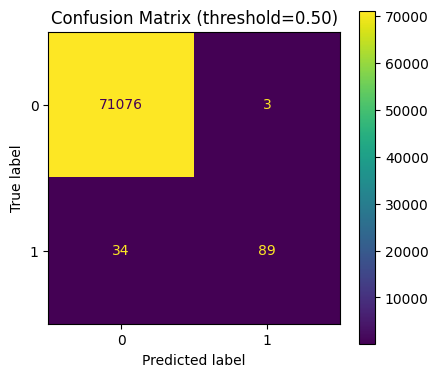

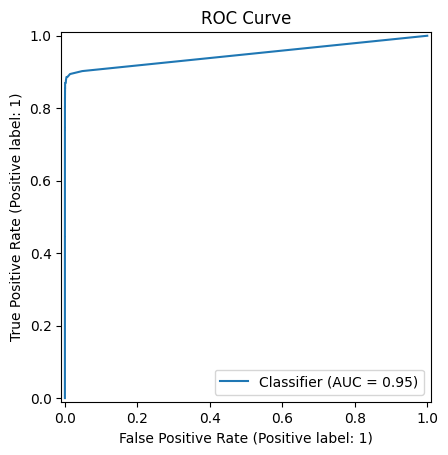

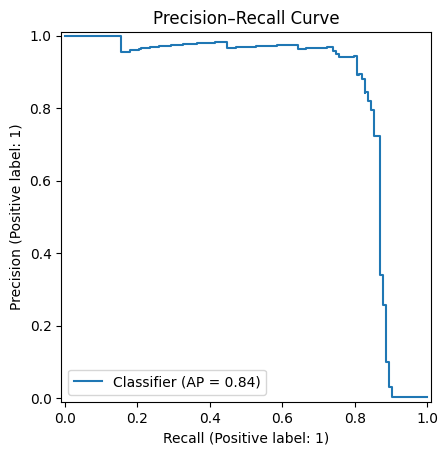

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, proba_test)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, proba_test)
plt.title('Precision–Recall Curve')
plt.show()

Insight:

1. TP 89 = Fraud correctly detected
FN 34 = Fraud missed by model
TN 71076 = Legitimate transactions correctly classified
FP 3 = Legitimate transactions wrongly flagged as fraud

2. AUC = 0.95 → excellent overall separability between fraud and legit.

The curve is close to the top-left corner → high true positive rate with low false positive rate.

model is very good at ranking transactions by fraud likelihood.

ROC-AUC is strong, but not enough alone — especially in imbalanced datasets.

3. Average Precision (PR-AUC) = 0.84 → very good performance under class imbalance.

The curve shows a strong balance between precision and recall.

Takeaways:
PR-AUC is more meaningful than ROC-AUC in fraud detection.

**Your model maintains high precision even as recall increases → ideal for minimizing false alarms while catching fraud.**



In [ ]:
# Optional: Save model for future stages (I think this is a good practice for reuseable programming)
import joblib
joblib.dump(pipe, "rf_fraud_baseline.joblib")

['rf_fraud_baseline.joblib']

**XGBoost**

Training XGBoost with GridSearch...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': np.float64(577.8753387533875)}
Best CV recall: 0.8753
XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.20      0.88      0.33       123

    accuracy                           0.99     71202
   macro avg       0.60      0.94      0.66     71202
weighted avg       1.00      0.99      1.00     71202


ROC-AUC: 0.9784
PR-AUC: 0.7657


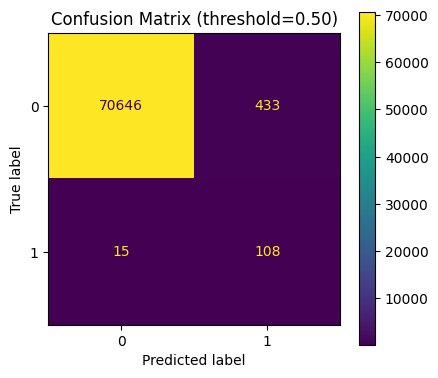

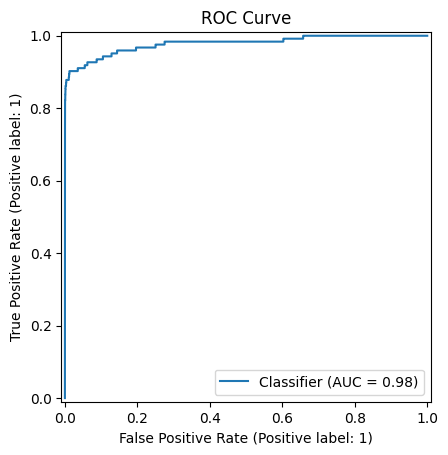

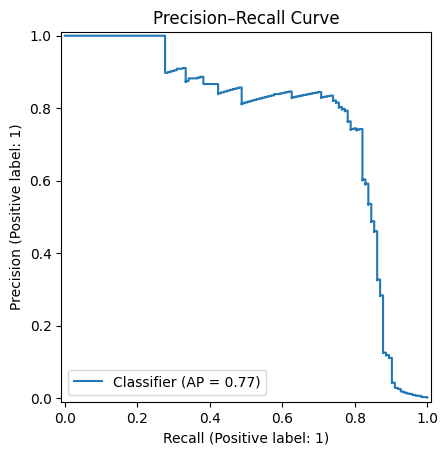

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Hyperparameter tuning for XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_params = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'scale_pos_weight': [scale_pos_weight]
}

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training XGBoost with GridSearch...")
xgb_grid.fit(X_train, y_train)

print(f"\nBest params: {xgb_grid.best_params_}")
print(f"Best CV recall: {xgb_grid.best_score_:.4f}")

# Evaluate XGBoost
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
y_pred_proba_xgb = xgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
print(f"PR-AUC: {pr_auc_xgb:.4f}")


# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_xgb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb)
plt.title('Precision–Recall Curve')
plt.show()

Insight:

1.

Recall is high: 108 out of 123 frauds detected → ~88% recall.

Precision is lower: 433 false alarms → only ~20% of flagged frauds are truly fraud.

Compared to Random Forest:

XGBoost catches more fraud (higher recall)

But raises more false alarms (lower precision)


2. ROC Curve (AUC = 0.98)
Excellent separability between fraud and legit.

Higher than Random Forest’s AUC (0.95) → XGBoost ranks fraud likelihood better.


3. Precision–Recall Curve (PR-AUC = 0.77)
Slightly lower than Random Forest’s PR-AUC (0.84).

Indicates that while XGBoost is better at recall, it sacrifices precision.

**Takeaways:**

XGBoost is aggressive: catches more fraud but flags more legit transactions.

Random Forest is conservative: fewer false alarms, but misses more fraud.

**Gradient Boosting: in fraud detection:Better recall than Random Forest.
More precision than XGBoost.**

It’s another powerful tree-based ensemble method, like Random Forest and XGBoost.

Builds trees sequentially, each one correcting the errors of the previous.

Focuses on hard-to-classify examples, making it good for subtle patterns.

Can be tuned to balance precision vs recall, especially in imbalanced datasets.
Gradient Boosting will likely sit between Random Forest and XGBoost:

Learns from residuals → good for rare fraud signals

Feature importance and SHAP values are easy to extract

**When to use:**

If you want a middle ground between Random Forest’s precision and XGBoost’s recall.

If you’re doing hyperparameter tuning and want to compare multiple models.

If your fraud signals are subtle and nonlinear, Gradient Boosting can help.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100],         # fewer trees → much faster
    'max_depth': [2],              # shallow trees → quick training
    'learning_rate': [0.2],        # larger step size → fewer trees needed
    'subsample': [0.8]             # keep stochastic element
    # Removed 'colsample_bytree' and 'scale_pos_weight' as they are not parameters for GradientBoostingClassifier
    # 'n_jobs' and 'random_state' are typically set in GridSearchCV or the estimator constructor, not in gb_params for GridSearch
}

# Initialize GradientBoostingClassifier with random_state for reproducibility
gb = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training Gradient Boosting with GridSearch...")
gb_grid.fit(X_train, y_train)

print(f"\nBest params: {gb_grid.best_params_}")
print(f"Best CV recall: {gb_grid.best_score_:.4f}")

# Predict and Evaluate using Gradient Boosting
y_pred_gb = gb_grid.best_estimator_.predict(X_test)
y_pred_proba_gb = gb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba_gb)
pr_auc_gb = auc(recall_gb, precision_gb)
print(f"PR-AUC: {pr_auc_gb:.4f}")

Training Gradient Boosting with GridSearch...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best params: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}
Best CV recall: 0.4499
Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.53      0.62       123

    accuracy                           1.00     71202
   macro avg       0.88      0.76      0.81     71202
weighted avg       1.00      1.00      1.00     71202


ROC-AUC: 0.6059
PR-AUC: 0.5229


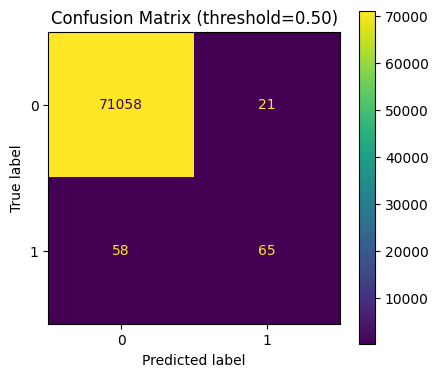

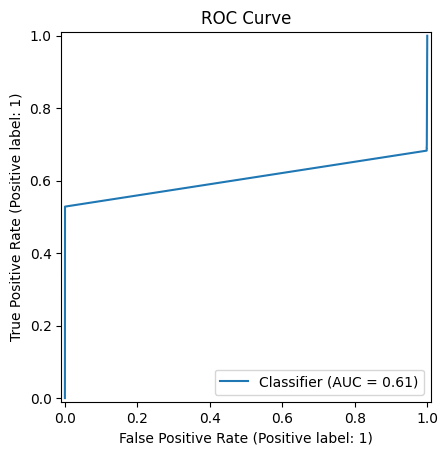

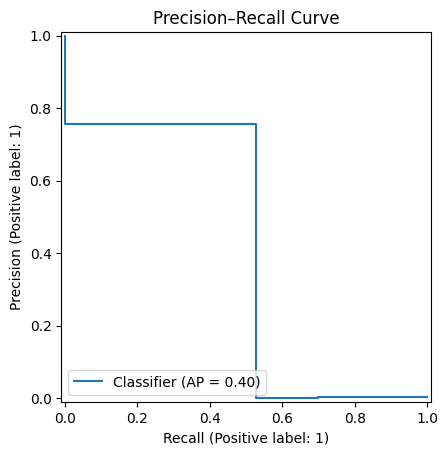

In [46]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_gb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_gb)
plt.title('Precision–Recall Curve')
plt.show()

LightGBM:

1. Make Gradient Boosting Better?

Tune hyperparameters more aggressively

Increase n_estimators to 300–500 (with early stopping).
Try learning_rate=0.05 or 0.1 — not too small.
Use max_depth=3–5 for balance.

2. Switch to LightGBM

It’s a faster, more scalable version of Gradient Boosting.
Handles imbalance better and supports GPU.



In [53]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Hyperparameter tuning for LightGBM
lgb_params = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [31],
    'class_weight': ['balanced']
}

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training LightGBM with GridSearch...")
lgb_grid.fit(X_train, y_train)

print(f"\nBest params: {lgb_grid.best_params_}")
print(f"Best CV recall: {lgb_grid.best_score_:.4f}")


# Evaluate LightGBM
y_pred_lgb = lgb_grid.best_estimator_.predict(X_test)
y_pred_proba_lgb = lgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
print(f"PR-AUC: {pr_auc_lgb:.4f}")

Training LightGBM with GridSearch...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best params: {'class_weight': 'balanced', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31}
Best CV recall: 0.8374
LightGBM Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.83      0.24       123

    accuracy                           0.99     71202
   macro avg       0.57      0.91      0.62     71202
weighted avg       1.00      0.99      0.99     71202


ROC-AUC: 0.9655
PR-AUC: 0.7372


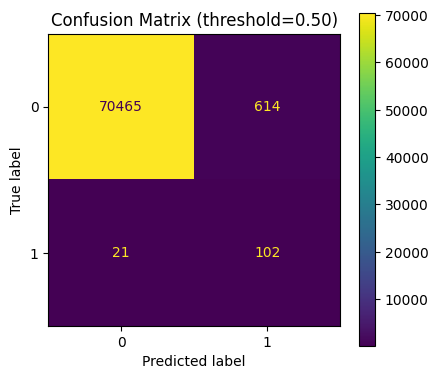

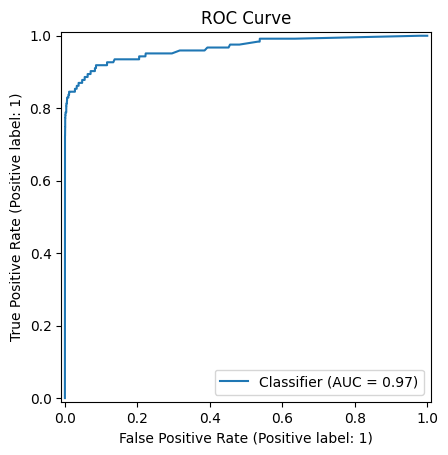

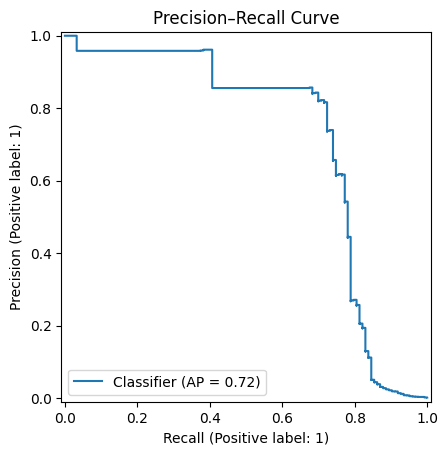

In [55]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_lgb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_lgb)
plt.title('Precision–Recall Curve')
plt.show()

**SUMMARY OF ALL MODELS**

In [54]:
# Summary of all models
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting', 'LightGBM'],
    'PR-AUC': [ap, pr_auc_xgb, pr_auc_gb, pr_auc_lgb],
    'ROC-AUC': [
        roc_auc_score(y_test, proba_test),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_lgb)
    ]
})

results = results.sort_values('PR-AUC', ascending=False)
print(results.to_string(index=False))

            Model   PR-AUC  ROC-AUC
    Random Forest 0.843707 0.948464
          XGBoost 0.765715 0.978371
         LightGBM 0.737215 0.965544
Gradient Boosting 0.522863 0.605920


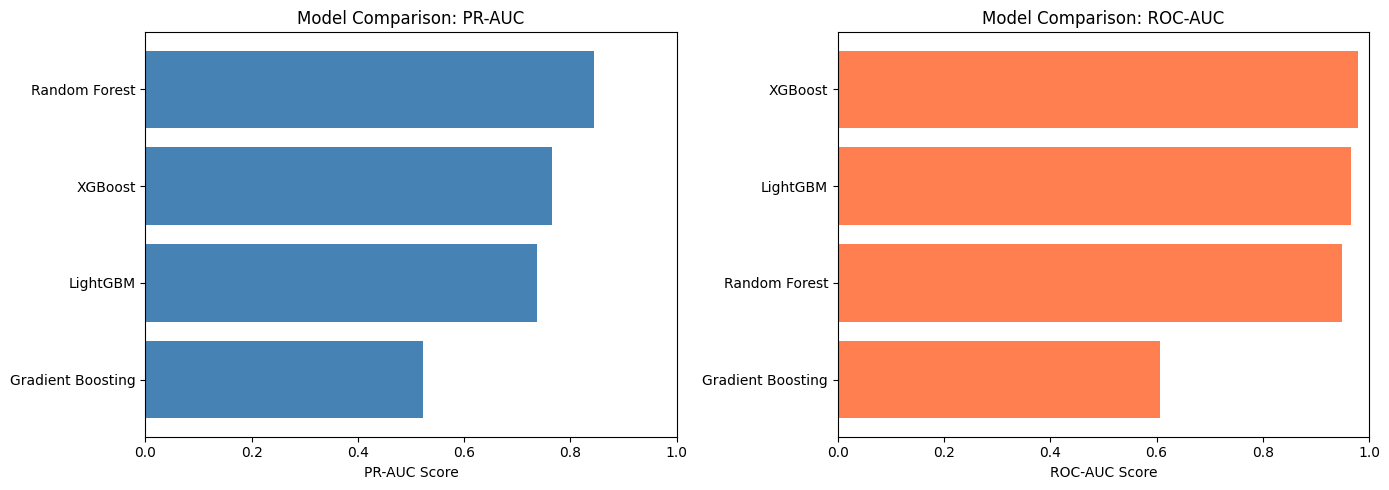

In [57]:
# Visualize model comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

results_sorted = results.sort_values('PR-AUC')
ax[0].barh(results_sorted['Model'], results_sorted['PR-AUC'], color='steelblue')
ax[0].set_xlabel('PR-AUC Score')
ax[0].set_title('Model Comparison: PR-AUC')
ax[0].set_xlim(0, 1)

results_sorted = results.sort_values('ROC-AUC')
ax[1].barh(results_sorted['Model'], results_sorted['ROC-AUC'], color='coral')
ax[1].set_xlabel('ROC-AUC Score')
ax[1].set_title('Model Comparison: ROC-AUC')
ax[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

**Chart 1: PR-AUC (Precision–Recall Area Under Curve)
Best for imbalanced datasets like fraud detection**

Focuses only on the positive class (fraud).

Tells you how well the model balances:

Precision → avoids false alarms.

Recall → catches actual frauds.

PR-AUC scores:
Random Forest -> excellent balance.

XGBoost -> good recall, lower precision.

rest 2 -> Lower performance'

**Chart 2: ROC-AUC (Receiver Operating Characteristic Area Under Curve): Fraud Risk scoring**

Measures overall separability between fraud and legit.
It’s strong at ranking transactions by fraud risk, making it useful for scoring systems.

Can look good even if the model misses most frauds.

Not ideal alone for imbalanced datasets.

Your ROC-AUC scores:

XGBoost → excellent ranking ability.

LightGBM - > very good
Random Forest → very good.

Gradient Boosting → poor.

Use XGBoost if you want to catch more frauds, even if it means more false alarms.


**Takeaways:**
Maximize fraud detection: XGBoost (high ROC-AUC, strong recall)

Minimize false alarms: Random Forest (high PR-AUC, strong precision)
